In [17]:
import pandas as pd
import numpy as np
import warnings
import datetime
import plotly.express as px
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.cluster import KMeans

from scipy.stats import pearsonr

from sklearn.metrics import ConfusionMatrixDisplay 
from matplotlib import pyplot as plt

import plotly.express as px

from graphviz import Digraph

In [18]:
warnings.filterwarnings("ignore")

In [19]:
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
def plot_apt_distribution(list_apt):
    for attack in list_apt.keys():
        k_means = list_apt[attack]
        x = k_means.keys()
        y = k_means.values()
        print(x)
        plt.bar(x, y, color ='maroon', width = 0.4)
        plt.xlim(-1,4)

        plt.xlabel("Cluster")
        plt.ylabel("")
        plt.title(attack)
        plt.show()

In [21]:
def extract_kmeans_results(data):
    k_means_list = {}
    for selcted_apt in data["APT"].unique():
        selected_apt_data = data.loc[data["APT"] == selcted_apt]
        k_means_dict = {}
        for attack_name in selected_apt_data["Label"].unique():
            selected_attack_data = selected_apt_data.loc[selected_apt_data["Label"] == attack_name]
            k_means_dict[attack_name] = dict(selected_attack_data["K_Means_Labels"].value_counts())
        k_means_list[selcted_apt] = k_means_dict
    return k_means_list

# All features

## Scaling

In [22]:
all_features = pd.read_csv("all_features_same_timestamp2.csv")
print("Data has {} rows & {} columns".format(all_features.shape[0], all_features.shape[1]))

all_features.columns

Data has 4283 rows & 247 columns


Index(['Unnamed: 0', 'Timestamp', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       ...
       'Dst Port_59905', 'Dst Port_60736', 'Dst Port_61715', 'Dst Port_64682',
       'Dst Port_64701', 'Protocol_6', 'APT', 'Label', 'Real_Timestamp',
       'K_Means_Labels'],
      dtype='object', length=247)

In [23]:
k_means_results_all_features = extract_kmeans_results(all_features)
k_means_results_all_features

{'apt1': {'Pivoting': {1: 612, 3: 179, 0: 43, 2: 28},
  'Reconnaissance': {1: 290, 2: 27, 3: 5},
  'LateralMovement': {0: 174, 3: 28, 1: 26, 2: 13},
  'DataExfiltration': {1: 164, 2: 156, 0: 147},
  'InitialCompromise': {1: 10, 0: 8, 2: 1}},
 'apt2': {'Pivoting': {1: 157, 3: 124, 0: 32, 2: 11},
  'Reconnaissance': {1: 101, 2: 17, 3: 5},
  'LateralMovement': {0: 113, 1: 19, 3: 10, 2: 7},
  'DataExfiltration': {0: 8, 2: 2},
  'InitialCompromise': {0: 8, 1: 7, 2: 2}},
 'apt3': {'Pivoting': {1: 349, 3: 167, 0: 50, 2: 17},
  'Reconnaissance': {1: 123, 0: 80, 2: 20, 3: 6},
  'LateralMovement': {0: 153, 3: 25, 1: 24, 2: 11},
  'DataExfiltration': {0: 11, 2: 1},
  'InitialCompromise': {1: 8, 0: 8, 3: 2, 2: 1}},
 'apt4': {'Pivoting': {1: 158, 3: 149, 0: 33, 2: 13},
  'Reconnaissance': {1: 134, 2: 24, 3: 1},
  'LateralMovement': {0: 96, 1: 15, 3: 8, 2: 6},
  'DataExfiltration': {0: 30, 3: 5, 2: 3},
  'InitialCompromise': {0: 8, 1: 7, 3: 2, 2: 1}}}

In [24]:
list_apt1 = k_means_results_all_features["apt1"]
list_apt2 = k_means_results_all_features["apt2"]
list_apt3 = k_means_results_all_features["apt3"]
list_apt4 = k_means_results_all_features["apt4"]

dict_keys([1, 3, 0, 2])


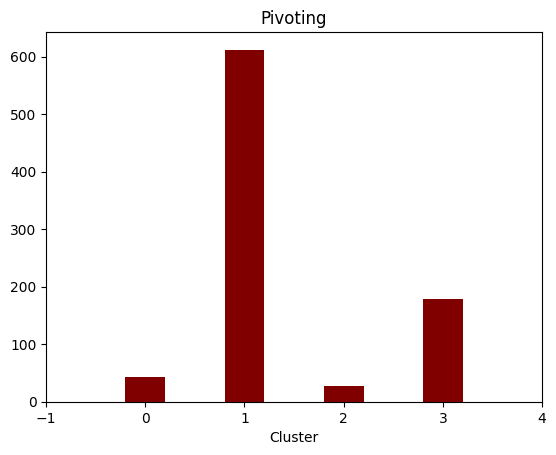

dict_keys([1, 2, 3])


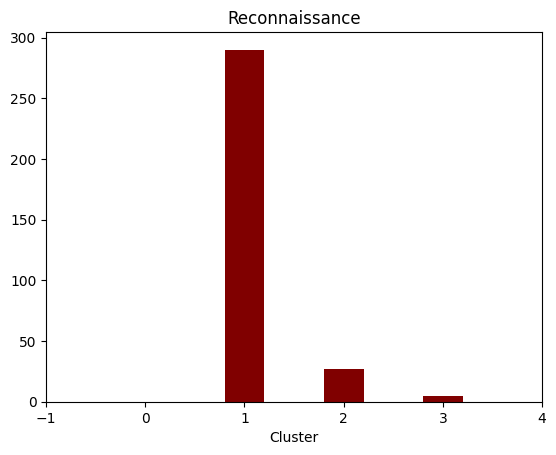

dict_keys([0, 3, 1, 2])


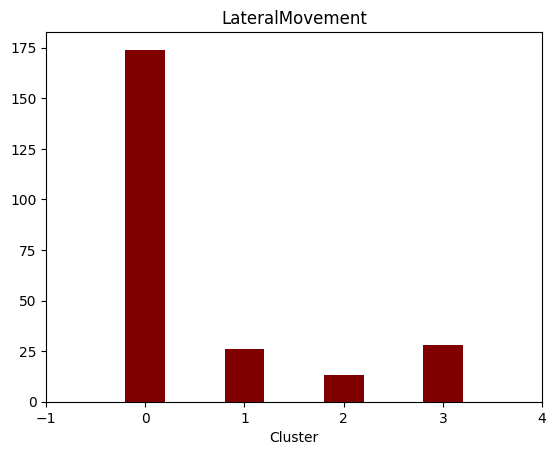

dict_keys([1, 2, 0])


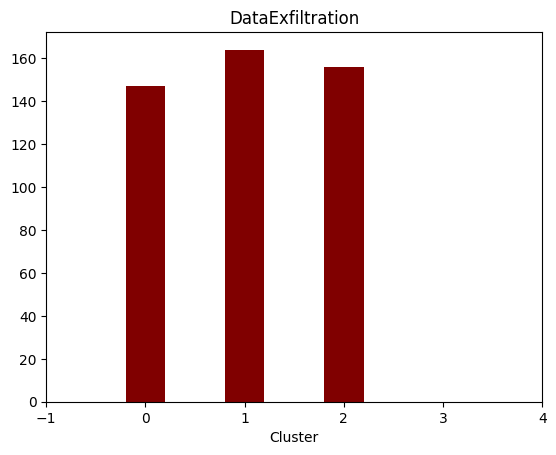

dict_keys([1, 0, 2])


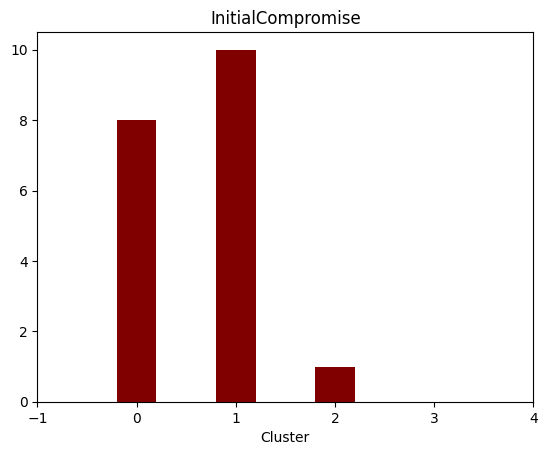

In [25]:
plot_apt_distribution(list_apt1)

dict_keys([1, 3, 0, 2])


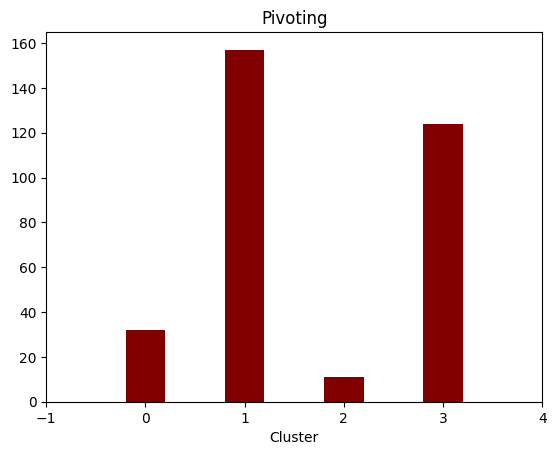

dict_keys([1, 2, 3])


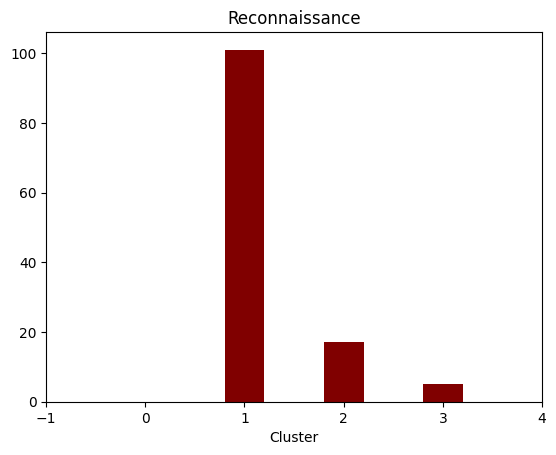

dict_keys([0, 1, 3, 2])


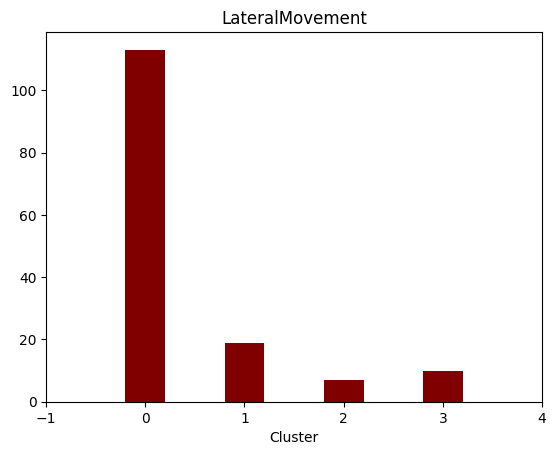

dict_keys([0, 2])


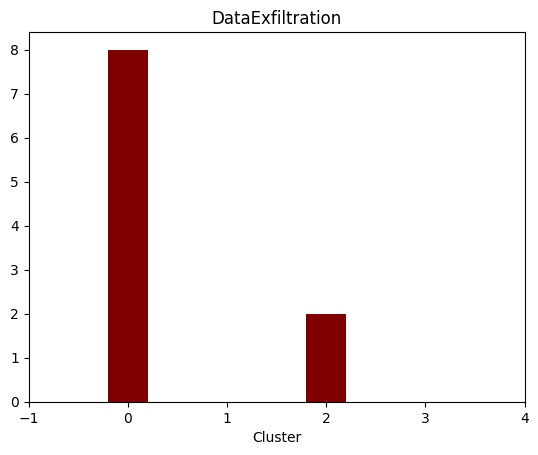

dict_keys([0, 1, 2])


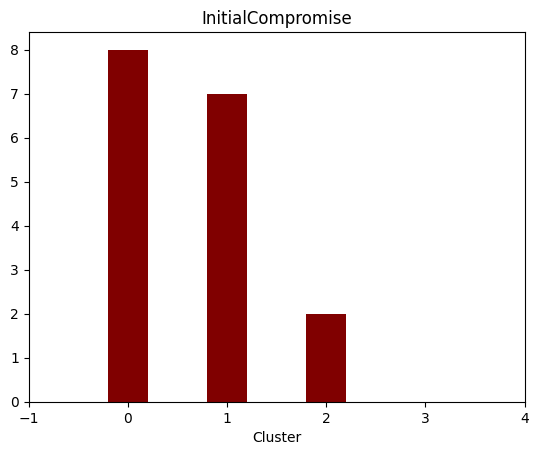

In [26]:
plot_apt_distribution(list_apt2)

dict_keys([1, 3, 0, 2])


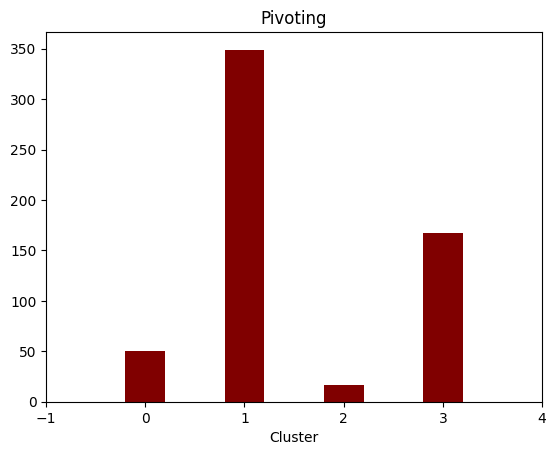

dict_keys([1, 0, 2, 3])


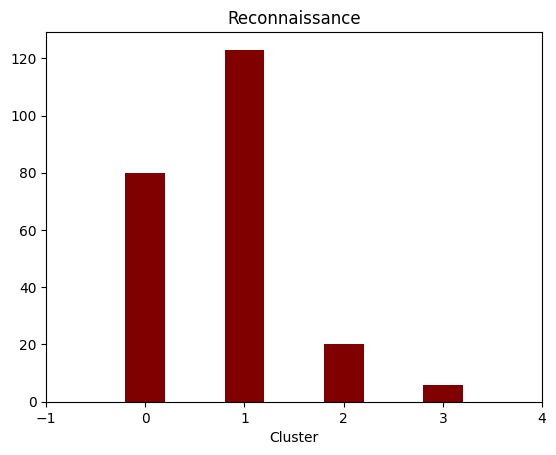

dict_keys([0, 3, 1, 2])


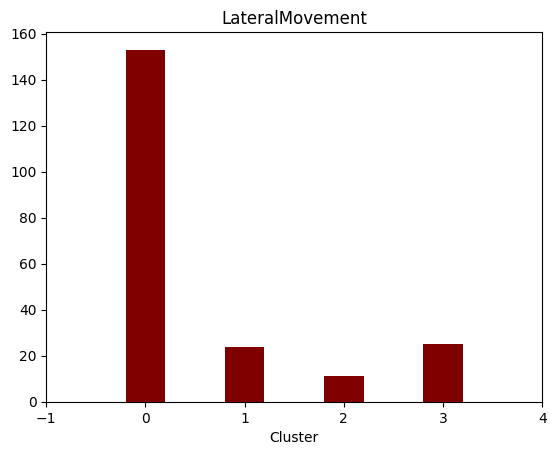

dict_keys([0, 2])


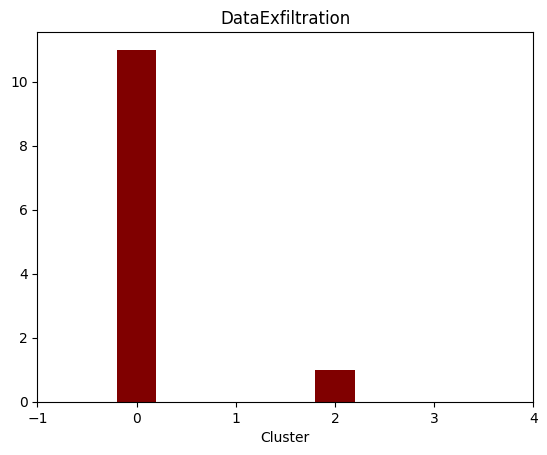

dict_keys([1, 0, 3, 2])


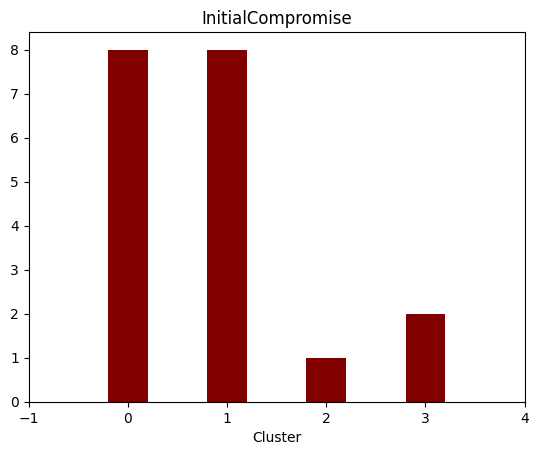

In [27]:
plot_apt_distribution(list_apt3)

dict_keys([1, 3, 0, 2])


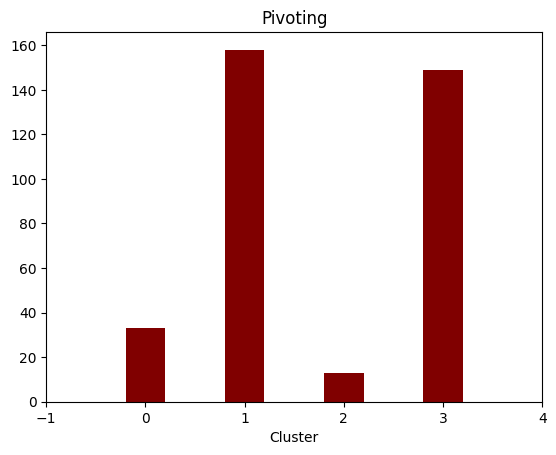

dict_keys([1, 2, 3])


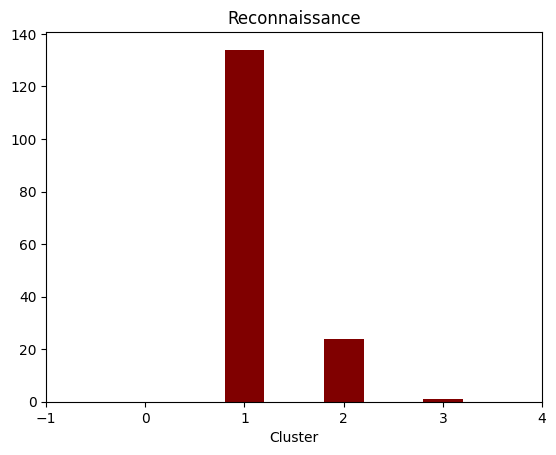

dict_keys([0, 1, 3, 2])


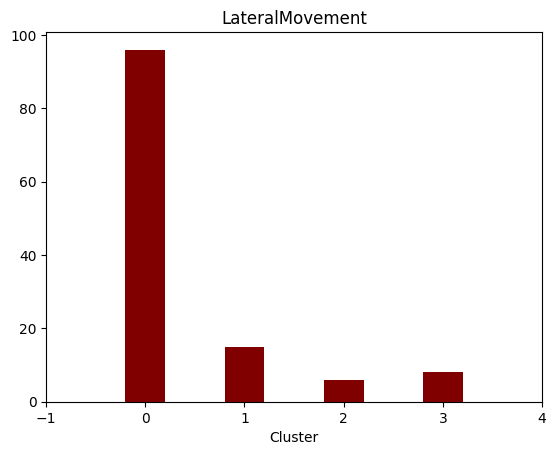

dict_keys([0, 3, 2])


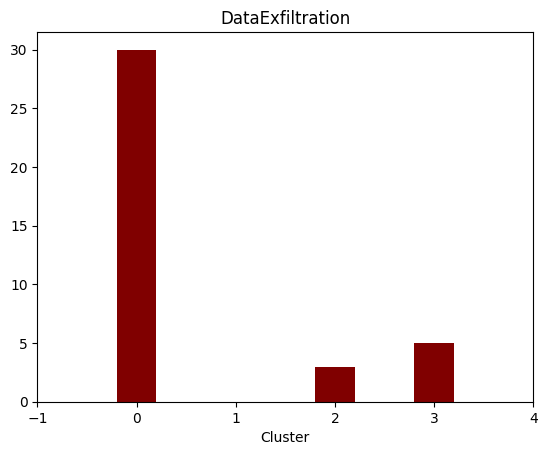

dict_keys([0, 1, 3, 2])


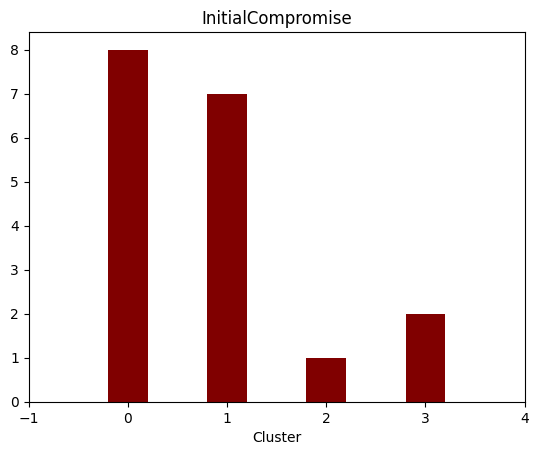

In [28]:
plot_apt_distribution(list_apt4)

## No-Scaling

In [29]:
all_features = pd.read_csv("all_features_same_timestamp_no_scaling.csv")
print("Data has {} rows & {} columns".format(all_features.shape[0], all_features.shape[1]))

all_features.columns

Data has 4283 rows & 247 columns


Index(['Unnamed: 0', 'Timestamp', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       ...
       'Dst Port_59905', 'Dst Port_60736', 'Dst Port_61715', 'Dst Port_64682',
       'Dst Port_64701', 'Protocol_6', 'APT', 'Label', 'Real_Timestamp',
       'K_Means_Labels'],
      dtype='object', length=247)

In [30]:
k_means_results_all_features = extract_kmeans_results(all_features)
k_means_results_all_features

{'apt1': {'Pivoting': {2: 834, 1: 28},
  'Reconnaissance': {2: 298, 1: 24},
  'LateralMovement': {2: 225, 1: 16},
  'DataExfiltration': {0: 463, 1: 4},
  'InitialCompromise': {2: 18, 1: 1}},
 'apt2': {'Pivoting': {0: 313, 1: 11},
  'Reconnaissance': {3: 107, 1: 16},
  'LateralMovement': {3: 145, 1: 4},
  'DataExfiltration': {3: 10},
  'InitialCompromise': {3: 15, 1: 2}},
 'apt3': {'Pivoting': {3: 566, 1: 17},
  'Reconnaissance': {0: 213, 1: 16},
  'LateralMovement': {0: 207, 1: 6},
  'DataExfiltration': {2: 12},
  'InitialCompromise': {0: 18, 1: 1}},
 'apt4': {'Pivoting': {3: 340, 1: 13},
  'Reconnaissance': {0: 139, 1: 20},
  'LateralMovement': {0: 121, 1: 4},
  'DataExfiltration': {2: 38},
  'InitialCompromise': {0: 17, 1: 1}}}

In [31]:
list_apt1 = k_means_results_all_features["apt1"]
list_apt2 = k_means_results_all_features["apt2"]
list_apt3 = k_means_results_all_features["apt3"]
list_apt4 = k_means_results_all_features["apt4"]

dict_keys([2, 1])


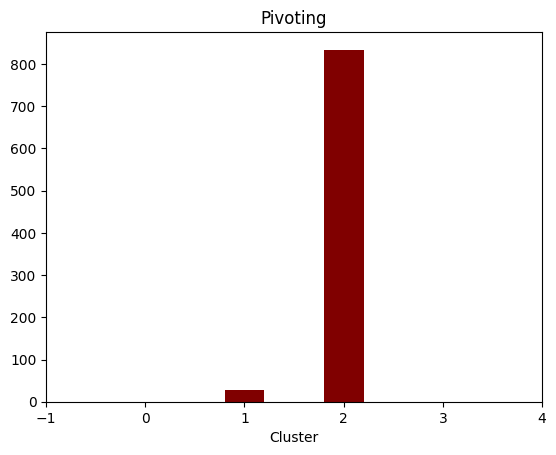

dict_keys([2, 1])


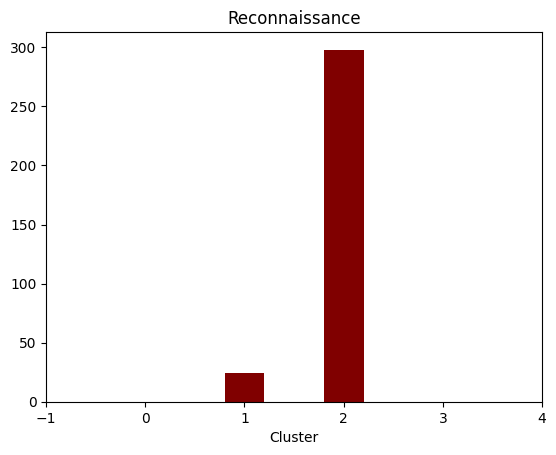

dict_keys([2, 1])


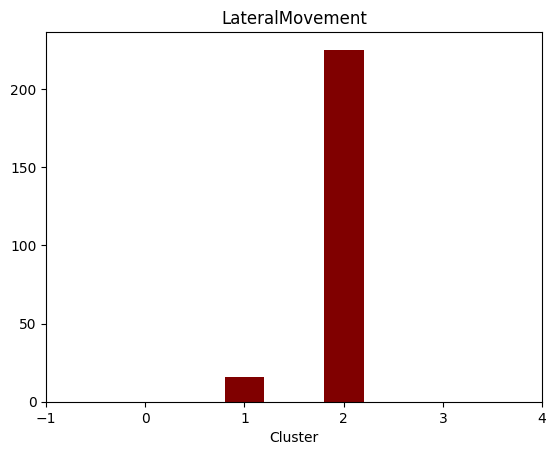

dict_keys([0, 1])


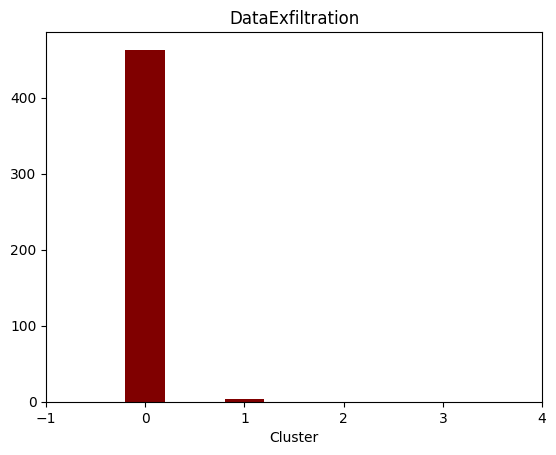

dict_keys([2, 1])


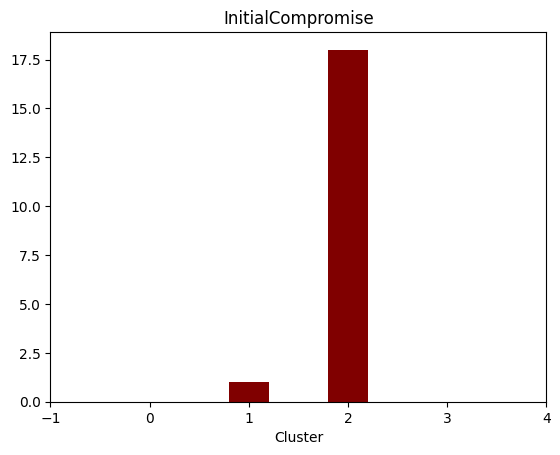

In [32]:
plot_apt_distribution(list_apt1)

dict_keys([0, 1])


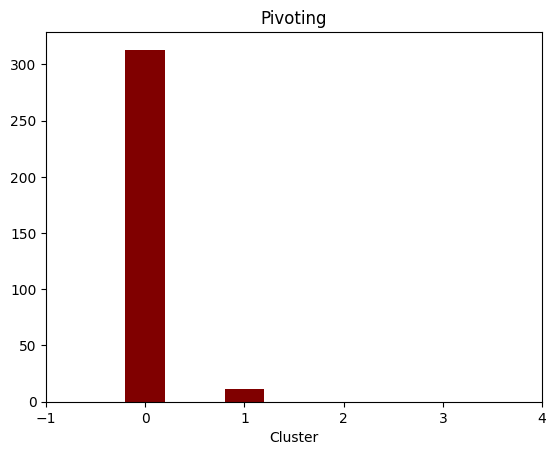

dict_keys([3, 1])


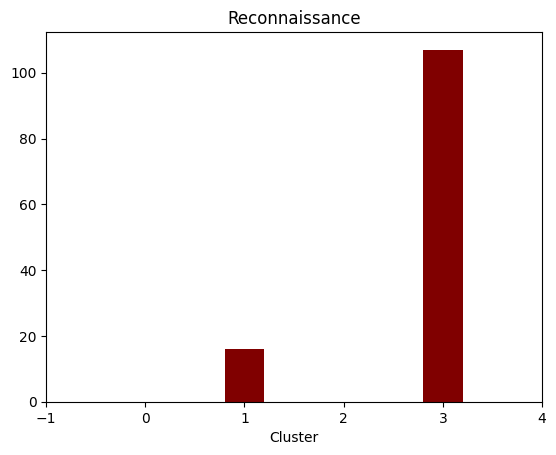

dict_keys([3, 1])


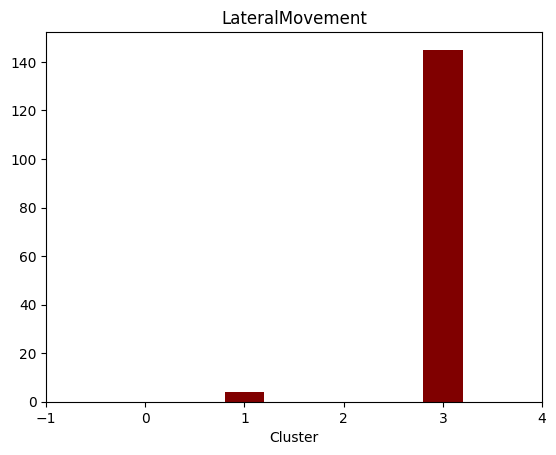

dict_keys([3])


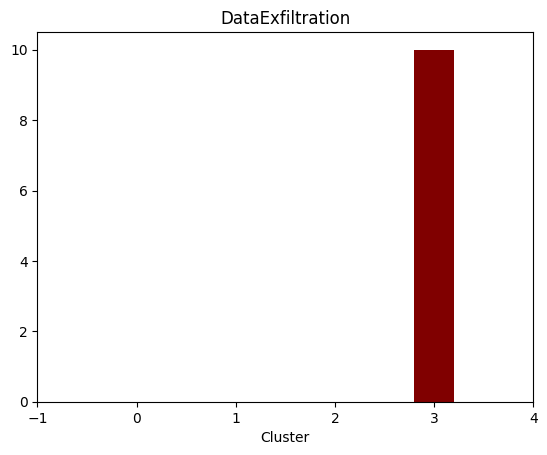

dict_keys([3, 1])


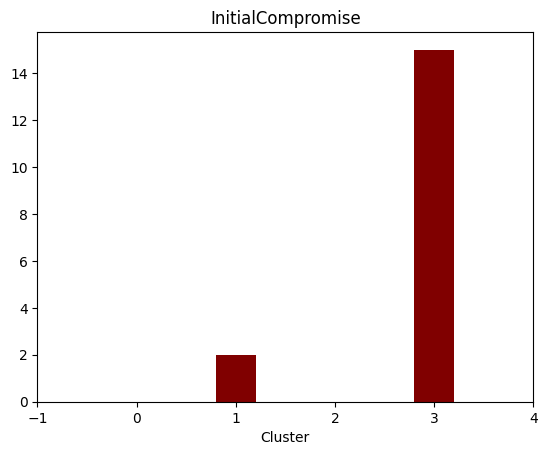

In [33]:
plot_apt_distribution(list_apt2)

dict_keys([3, 1])


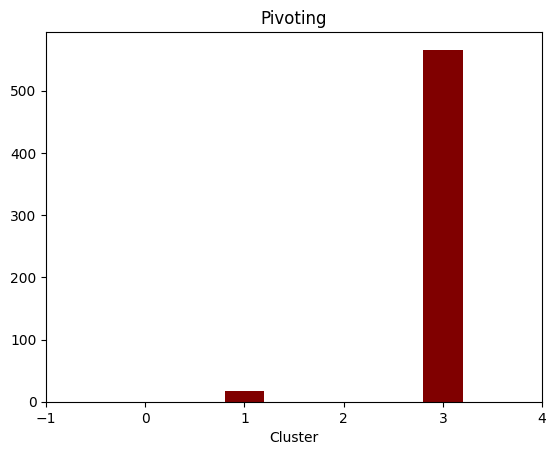

dict_keys([0, 1])


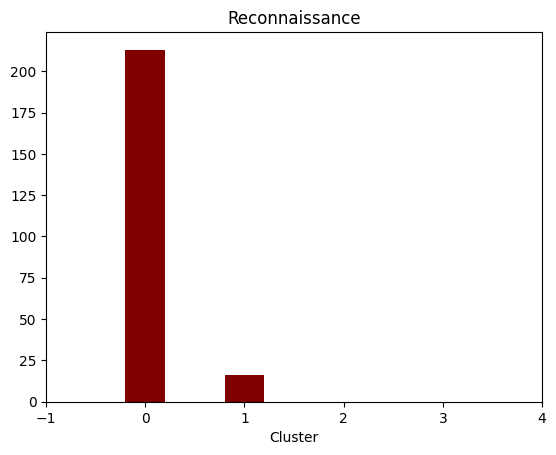

dict_keys([0, 1])


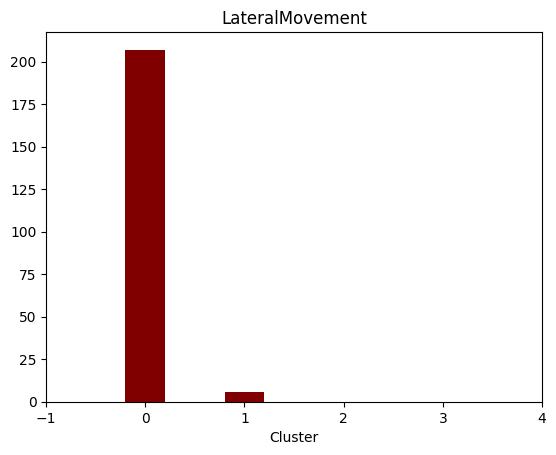

dict_keys([2])


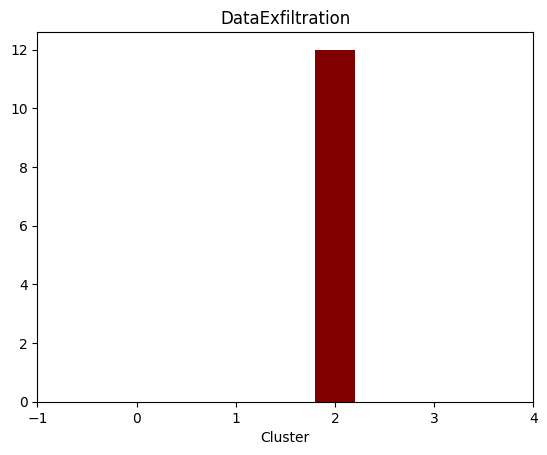

dict_keys([0, 1])


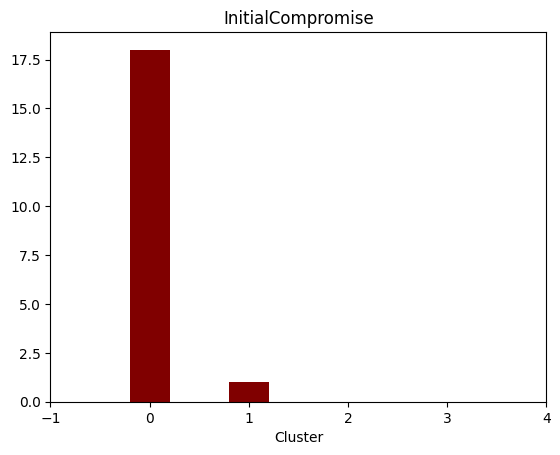

In [34]:
plot_apt_distribution(list_apt3)

dict_keys([3, 1])


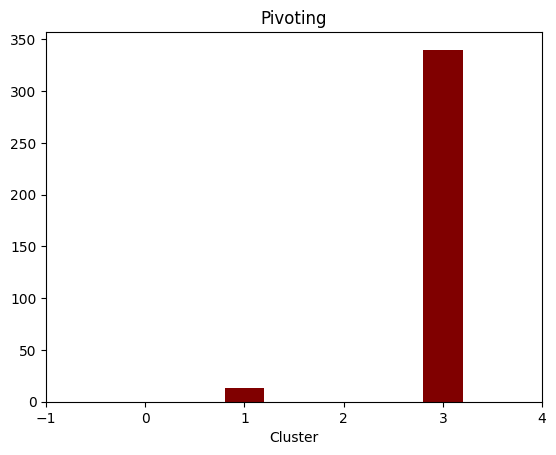

dict_keys([0, 1])


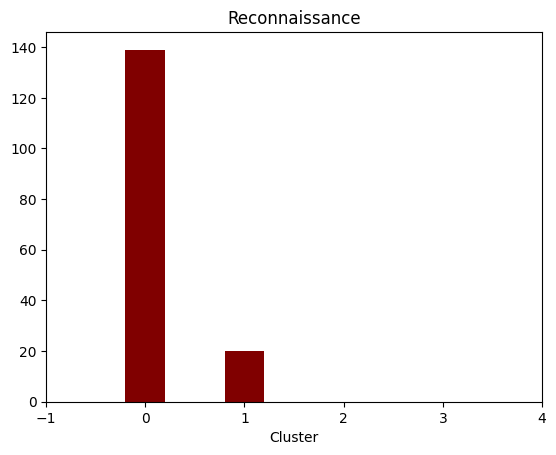

dict_keys([0, 1])


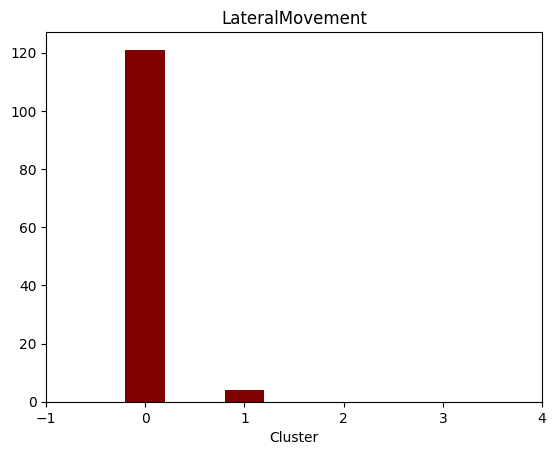

dict_keys([2])


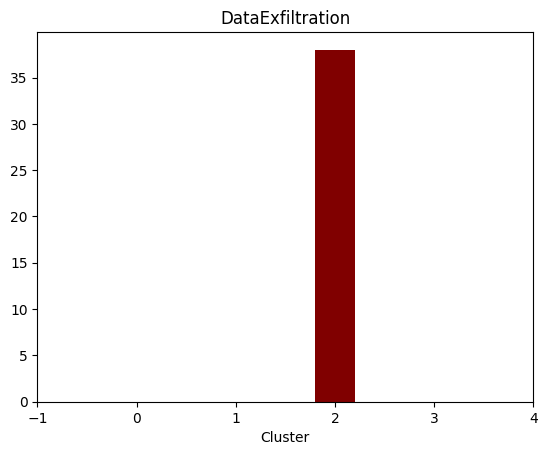

dict_keys([0, 1])


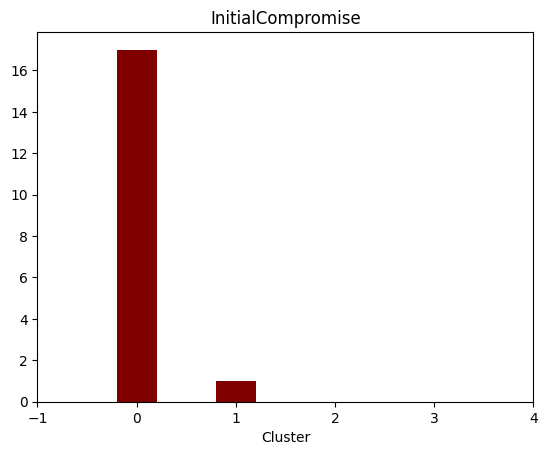

In [35]:
plot_apt_distribution(list_apt4)

# Selected Features

## Scaled

In [36]:
selected_features2 = pd.read_csv("selected_features_same_timestamp2.csv")
print("Data has {} rows & {} columns".format(selected_features2.shape[0], selected_features2.shape[1]))

selected_features2.columns

Data has 4283 rows & 176 columns


Index(['Unnamed: 0', 'Timestamp', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Src IP_10.147.20.236',
       'Src IP_10.147.20.237', 'Src IP_172.28.128.10',
       ...
       'Dst Port_59905', 'Dst Port_60736', 'Dst Port_61715', 'Dst Port_64682',
       'Dst Port_64701', 'Protocol_6', 'APT', 'Label', 'K_Means_Labels',
       'Real_Timestamp'],
      dtype='object', length=176)

In [37]:
list_plot = extract_kmeans_results(selected_features2)
list_plot

{'apt1': {'Pivoting': {1: 353, 3: 247, 2: 224, 0: 38},
  'Reconnaissance': {3: 220, 1: 81, 0: 21},
  'LateralMovement': {2: 100, 0: 79, 3: 38, 1: 24},
  'DataExfiltration': {2: 186, 0: 152, 1: 69, 3: 60},
  'InitialCompromise': {3: 8, 1: 8, 0: 2, 2: 1}},
 'apt2': {'Pivoting': {1: 122, 2: 101, 3: 66, 0: 35},
  'Reconnaissance': {3: 63, 1: 47, 0: 11, 2: 2},
  'LateralMovement': {0: 53, 2: 49, 3: 30, 1: 17},
  'DataExfiltration': {1: 8, 0: 2},
  'InitialCompromise': {1: 8, 3: 5, 0: 3, 2: 1}},
 'apt3': {'Pivoting': {1: 218, 2: 211, 3: 87, 0: 67},
  'Reconnaissance': {0: 99, 3: 82, 1: 46, 2: 2},
  'LateralMovement': {0: 74, 2: 71, 3: 44, 1: 24},
  'DataExfiltration': {1: 11, 0: 1},
  'InitialCompromise': {1: 8, 3: 7, 0: 3, 2: 1}},
 'apt4': {'Pivoting': {1: 156, 2: 111, 3: 54, 0: 32},
  'Reconnaissance': {1: 79, 3: 67, 0: 13},
  'LateralMovement': {0: 51, 2: 30, 3: 30, 1: 14},
  'DataExfiltration': {1: 34, 0: 3, 3: 1},
  'InitialCompromise': {1: 8, 3: 7, 0: 2, 2: 1}}}

In [38]:
list_apt1 = list_plot["apt1"]
list_apt2 = list_plot["apt2"]
list_apt3 = list_plot["apt3"]
list_apt4 = list_plot["apt4"]


dict_keys([1, 3, 2, 0])


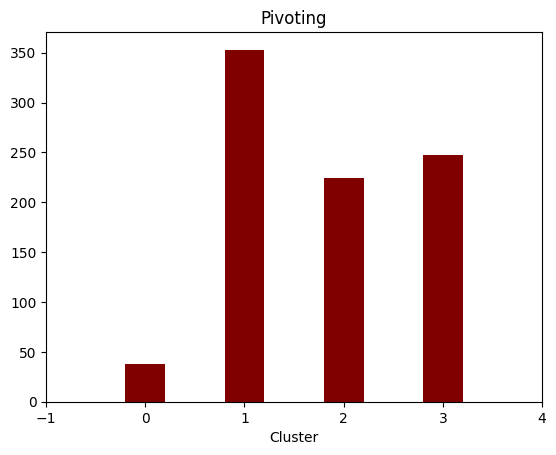

dict_keys([3, 1, 0])


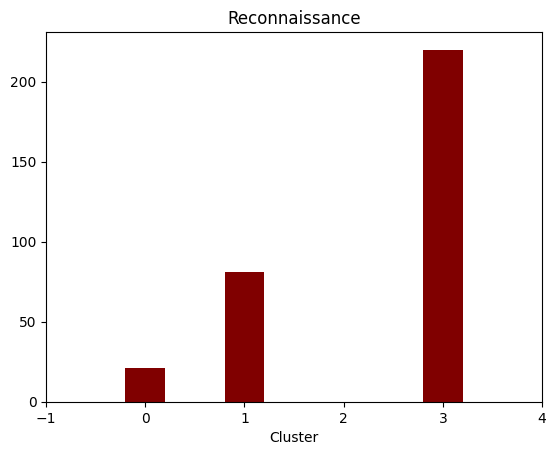

dict_keys([2, 0, 3, 1])


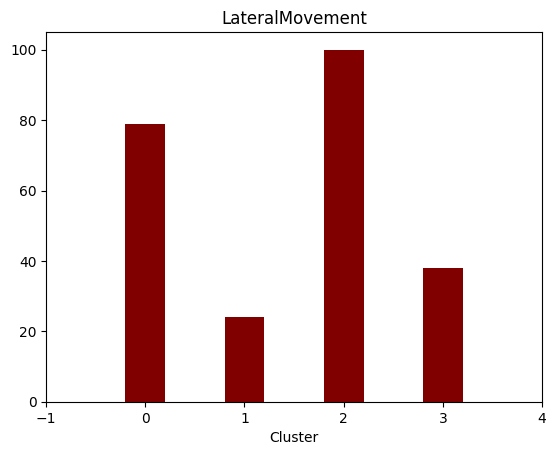

dict_keys([2, 0, 1, 3])


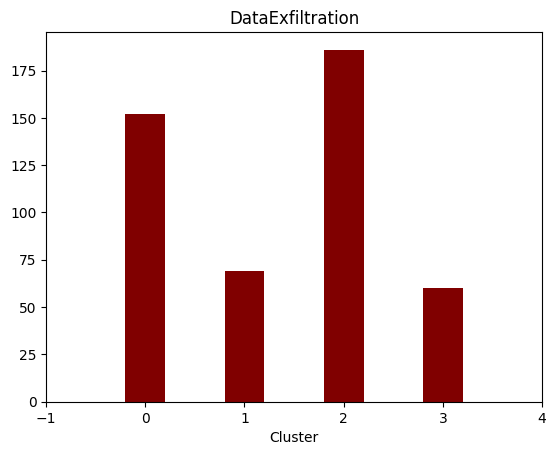

dict_keys([3, 1, 0, 2])


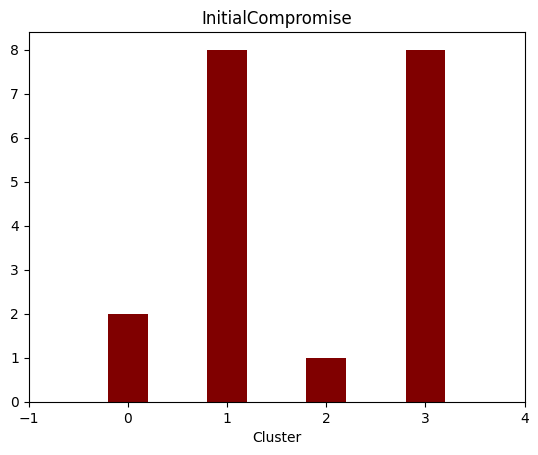

In [39]:
plot_apt_distribution(list_apt1)

dict_keys([1, 2, 3, 0])


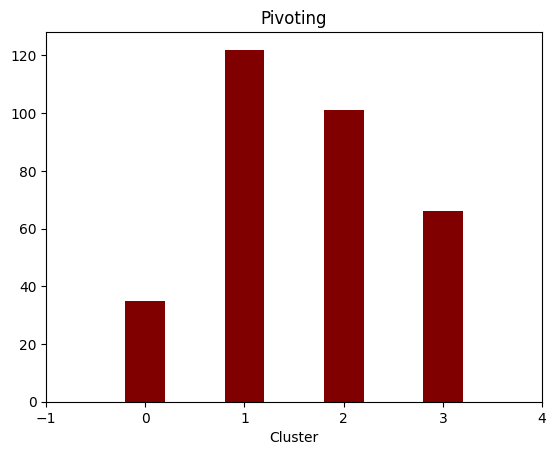

dict_keys([3, 1, 0, 2])


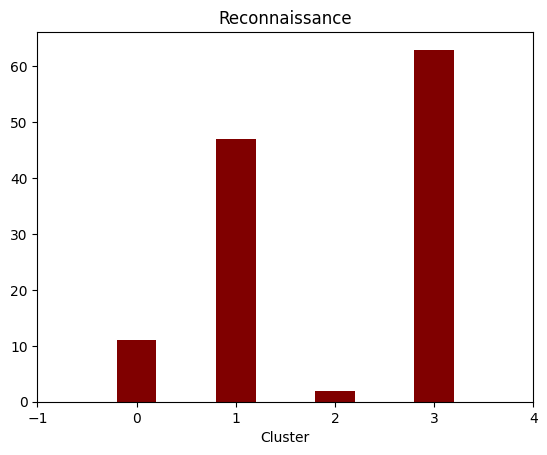

dict_keys([0, 2, 3, 1])


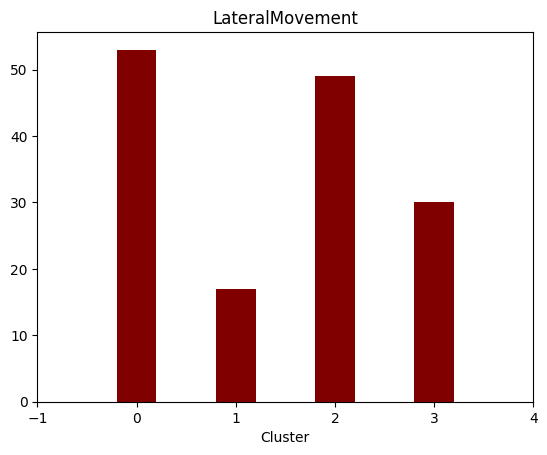

dict_keys([1, 0])


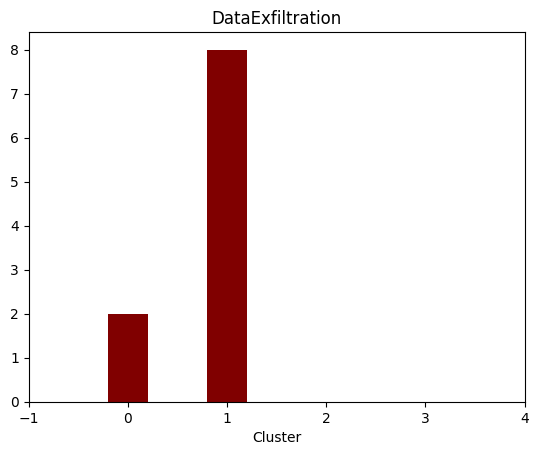

dict_keys([1, 3, 0, 2])


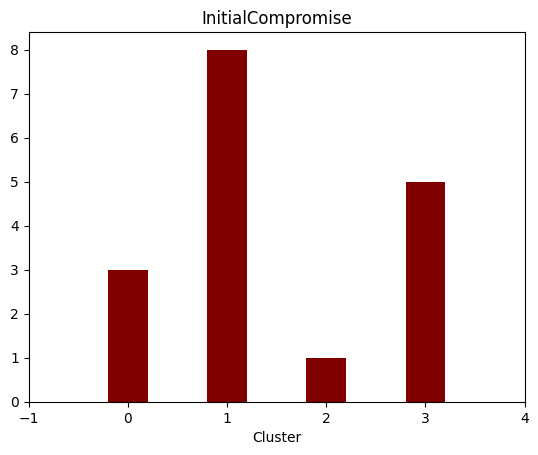

In [40]:
plot_apt_distribution(list_apt2)

dict_keys([1, 2, 3, 0])


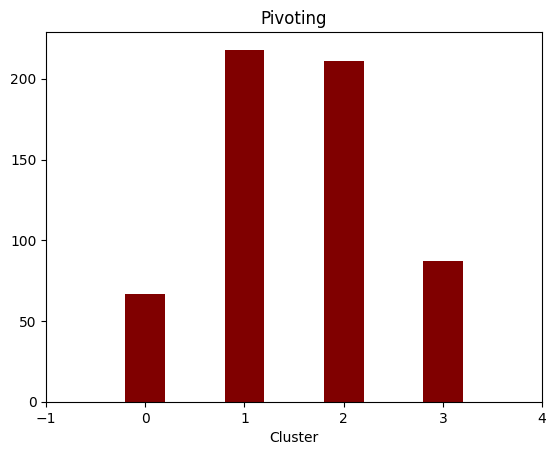

dict_keys([0, 3, 1, 2])


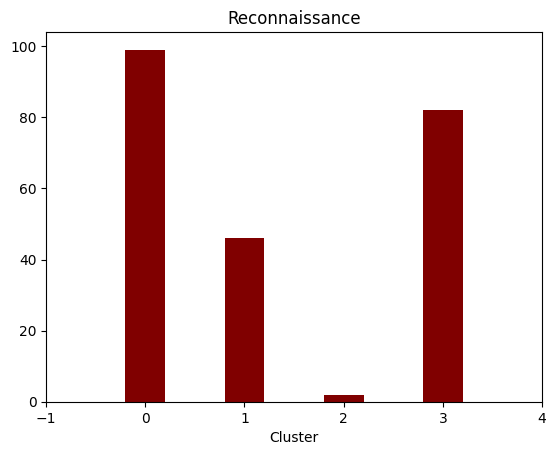

dict_keys([0, 2, 3, 1])


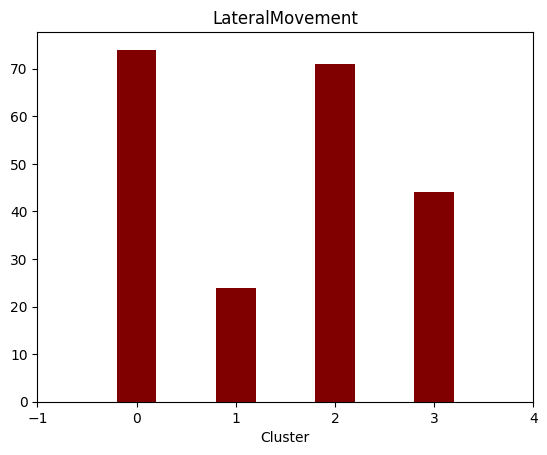

dict_keys([1, 0])


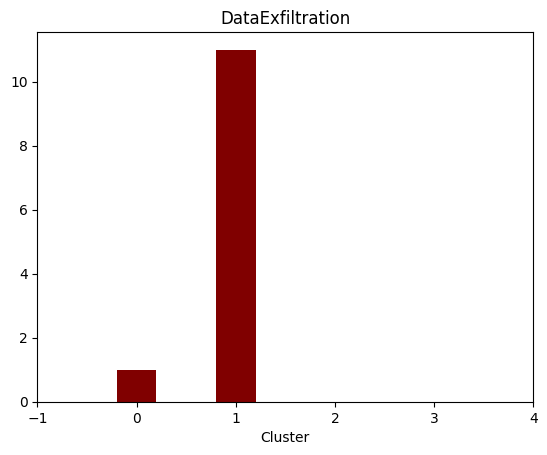

dict_keys([1, 3, 0, 2])


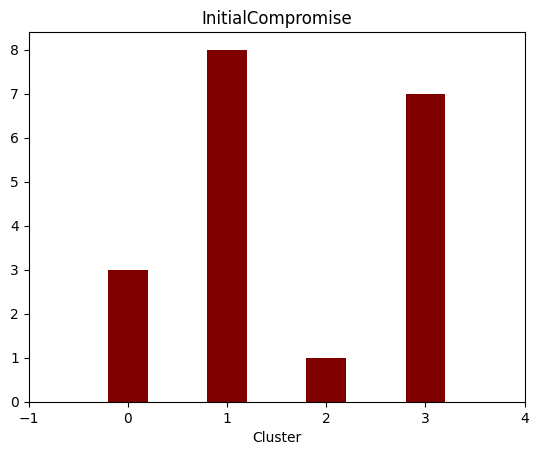

In [41]:
plot_apt_distribution(list_apt3)

dict_keys([1, 2, 3, 0])


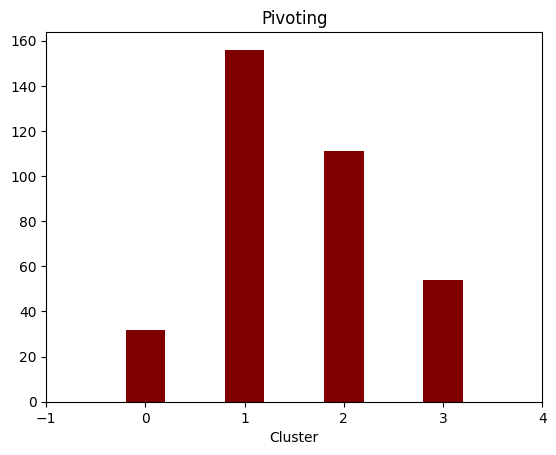

dict_keys([1, 3, 0])


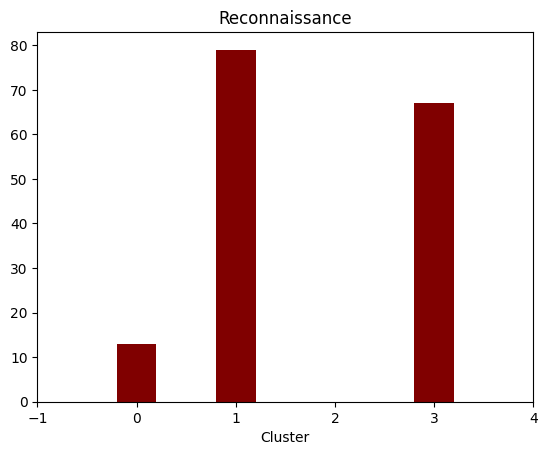

dict_keys([0, 2, 3, 1])


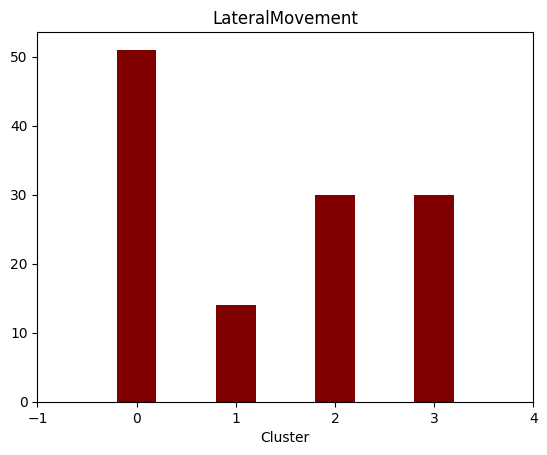

dict_keys([1, 0, 3])


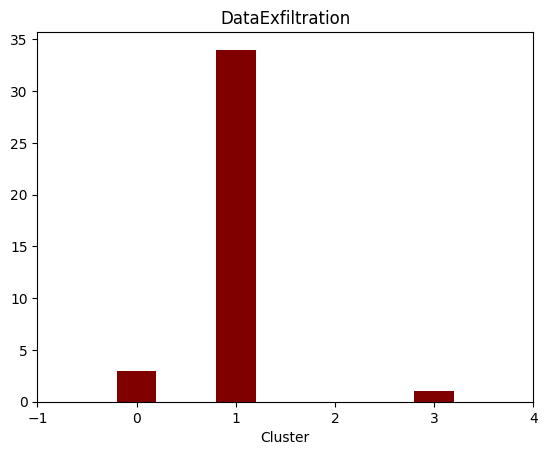

dict_keys([1, 3, 0, 2])


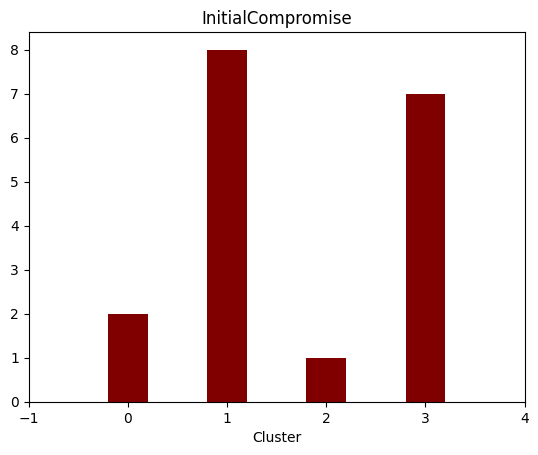

In [42]:
plot_apt_distribution(list_apt4)

## No-Scaling

In [46]:
selected_features2 = pd.read_csv("seleceted_features_no_scaling.csv")
print("Data has {} rows & {} columns".format(selected_features2.shape[0], selected_features2.shape[1]))

selected_features2.columns

Data has 4283 rows & 176 columns


Index(['Unnamed: 0', 'Timestamp', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Src IP_10.147.20.236',
       'Src IP_10.147.20.237', 'Src IP_172.28.128.10',
       ...
       'Dst Port_59905', 'Dst Port_60736', 'Dst Port_61715', 'Dst Port_64682',
       'Dst Port_64701', 'Protocol_6', 'APT', 'Label', 'Real_Timestamp',
       'K_Means_Labels'],
      dtype='object', length=176)

In [47]:
list_plot = extract_kmeans_results(selected_features2)
list_plot

{'apt1': {'Pivoting': {0: 638, 1: 125, 3: 51, 2: 48},
  'Reconnaissance': {0: 257, 1: 30, 2: 28, 3: 7},
  'LateralMovement': {0: 110, 1: 80, 3: 29, 2: 22},
  'DataExfiltration': {0: 356, 2: 54, 1: 49, 3: 8},
  'InitialCompromise': {0: 10, 1: 6, 2: 3}},
 'apt2': {'Pivoting': {0: 151, 1: 76, 2: 58, 3: 39},
  'Reconnaissance': {0: 72, 1: 21, 2: 16, 3: 14},
  'LateralMovement': {0: 70, 1: 47, 2: 25, 3: 7},
  'DataExfiltration': {1: 4, 2: 4, 0: 2},
  'InitialCompromise': {0: 10, 2: 3, 1: 3, 3: 1}},
 'apt3': {'Pivoting': {0: 367, 1: 116, 3: 50, 2: 50},
  'Reconnaissance': {2: 103, 0: 84, 3: 22, 1: 20},
  'LateralMovement': {0: 96, 1: 57, 2: 41, 3: 19},
  'DataExfiltration': {3: 4, 1: 4, 2: 3, 0: 1},
  'InitialCompromise': {0: 9, 1: 6, 2: 2, 3: 2}},
 'apt4': {'Pivoting': {0: 151, 1: 120, 2: 57, 3: 25},
  'Reconnaissance': {0: 101, 1: 23, 2: 21, 3: 14},
  'LateralMovement': {0: 58, 2: 31, 1: 29, 3: 7},
  'DataExfiltration': {1: 21, 3: 9, 2: 6, 0: 2},
  'InitialCompromise': {0: 10, 1: 5, 2: 2, 

In [48]:
list_apt1 = list_plot["apt1"]
list_apt2 = list_plot["apt2"]
list_apt3 = list_plot["apt3"]
list_apt4 = list_plot["apt4"]

dict_keys([0, 1, 3, 2])


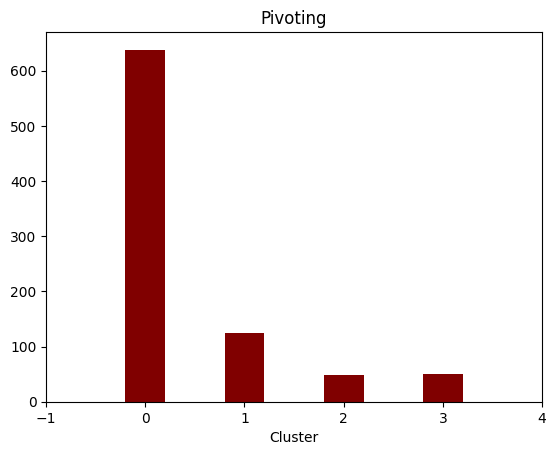

dict_keys([0, 1, 2, 3])


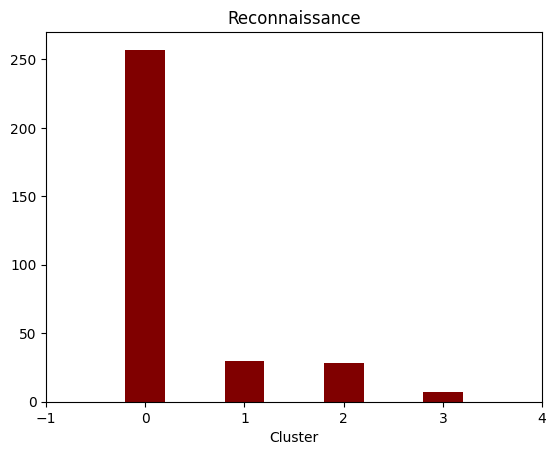

dict_keys([0, 1, 3, 2])


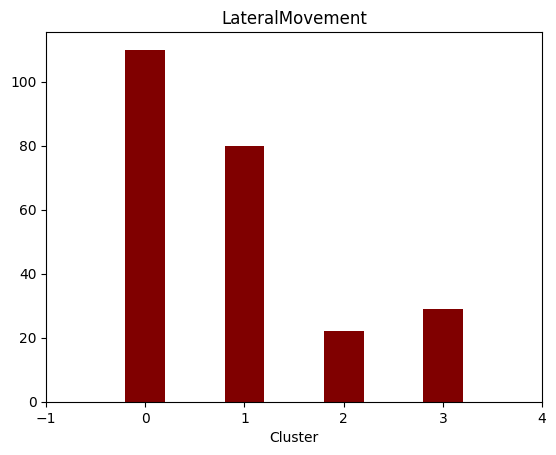

dict_keys([0, 2, 1, 3])


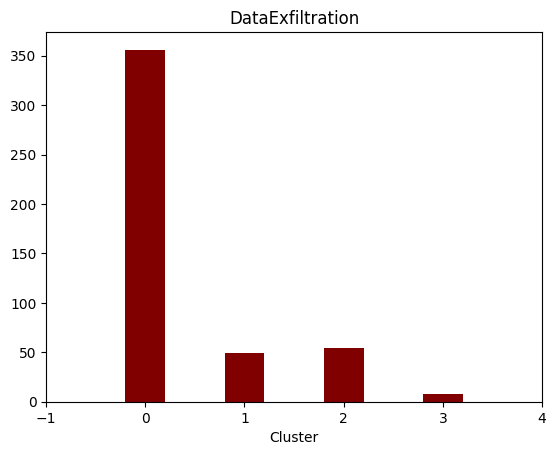

dict_keys([0, 1, 2])


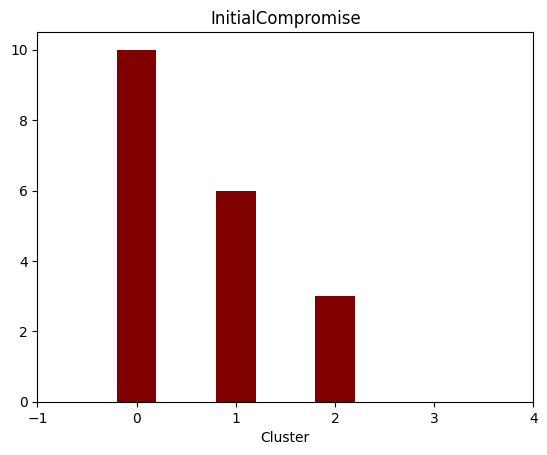

In [49]:
plot_apt_distribution(list_apt1)

dict_keys([0, 1, 2, 3])


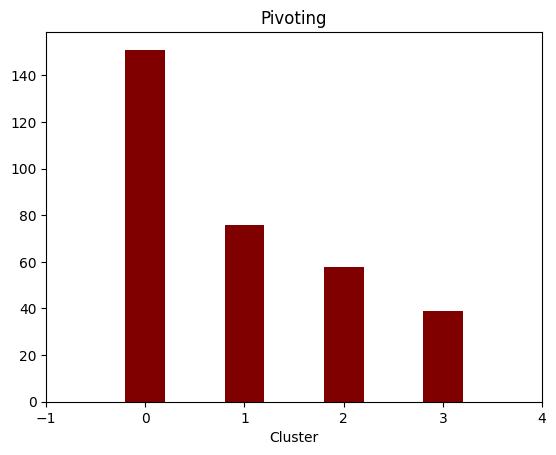

dict_keys([0, 1, 2, 3])


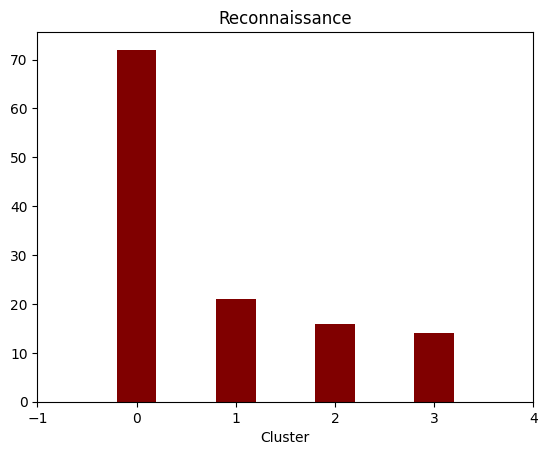

dict_keys([0, 1, 2, 3])


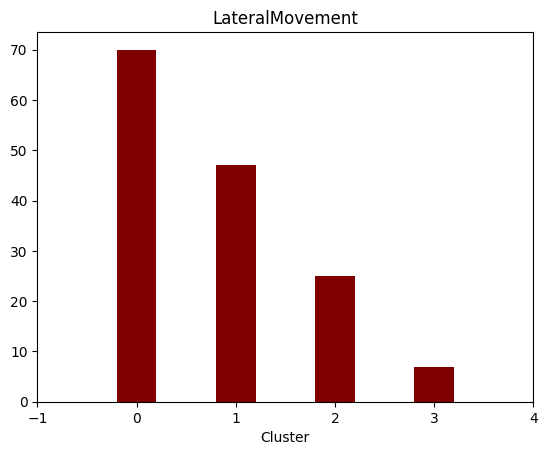

dict_keys([1, 2, 0])


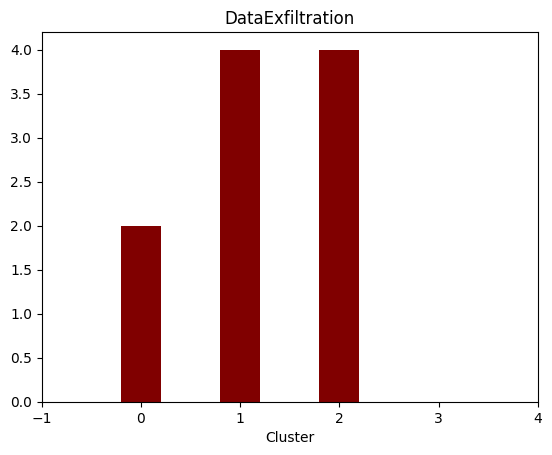

dict_keys([0, 2, 1, 3])


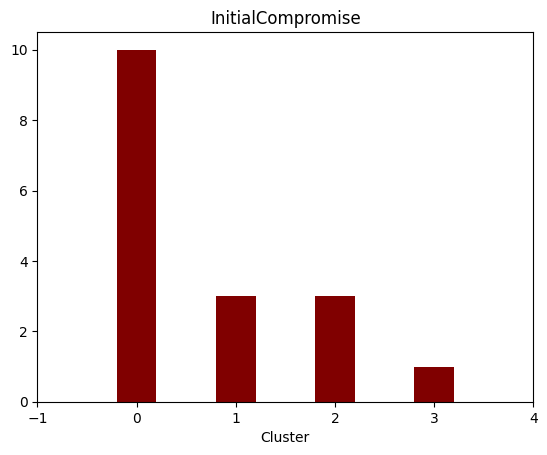

In [50]:
plot_apt_distribution(list_apt2)

dict_keys([0, 1, 3, 2])


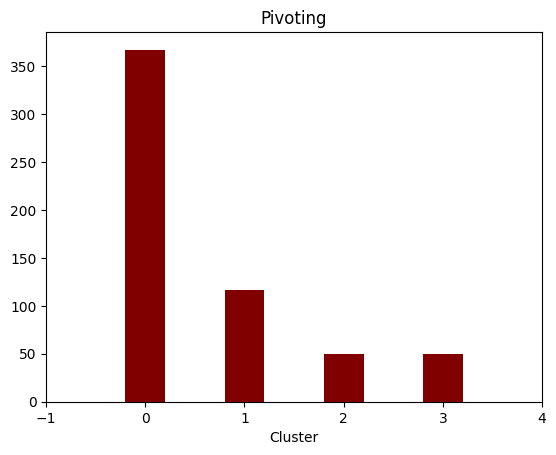

dict_keys([2, 0, 3, 1])


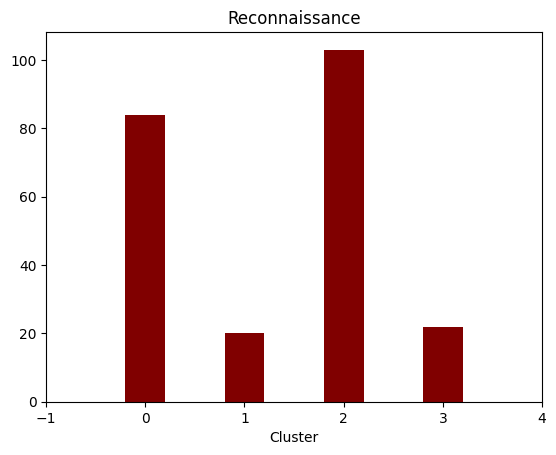

dict_keys([0, 1, 2, 3])


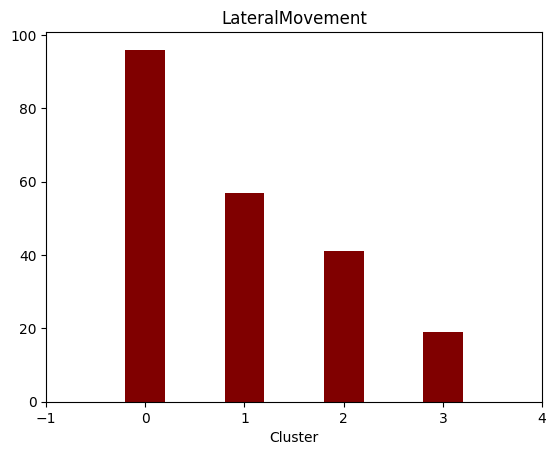

dict_keys([3, 1, 2, 0])


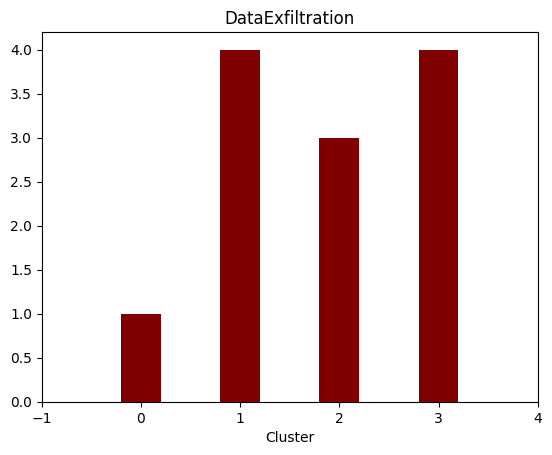

dict_keys([0, 1, 2, 3])


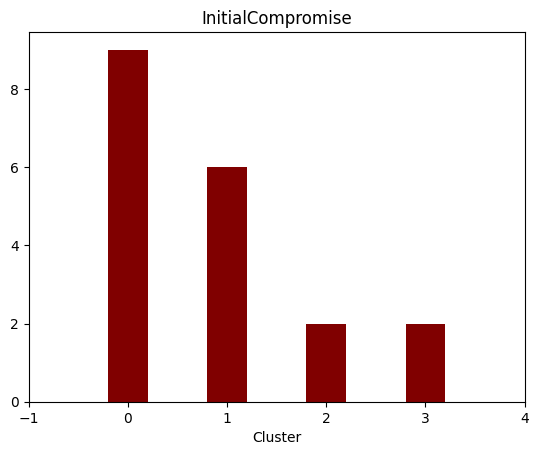

In [51]:
plot_apt_distribution(list_apt3)

dict_keys([0, 1, 2, 3])


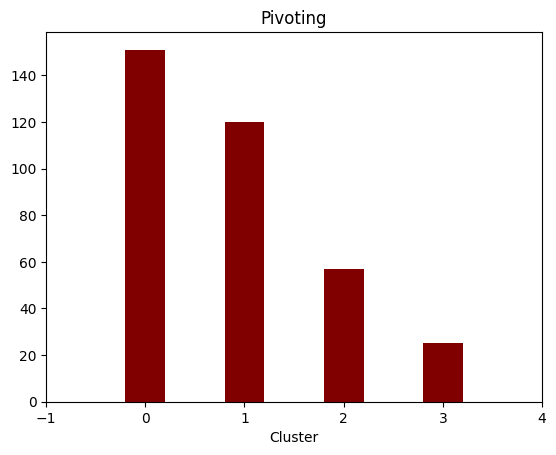

dict_keys([0, 1, 2, 3])


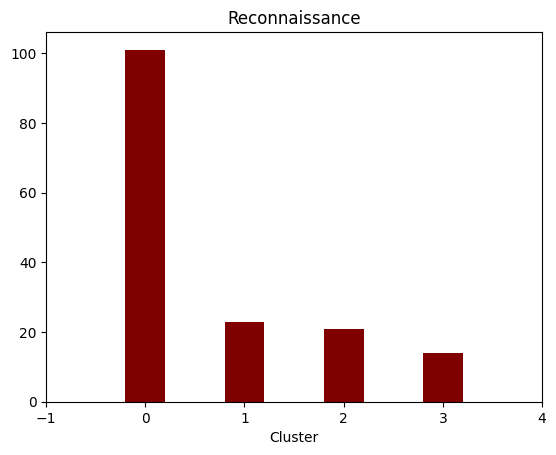

dict_keys([0, 2, 1, 3])


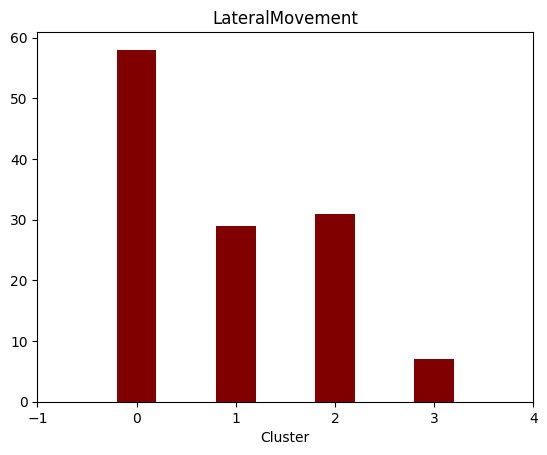

dict_keys([1, 3, 2, 0])


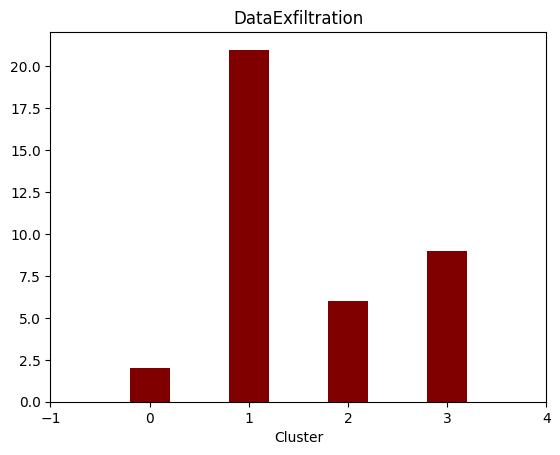

dict_keys([0, 1, 2, 3])


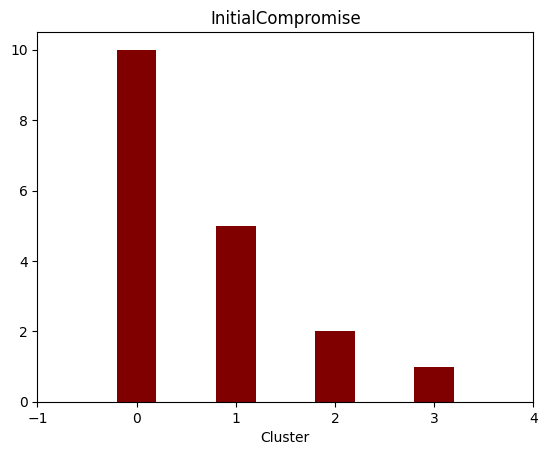

In [52]:
plot_apt_distribution(list_apt4)